In [1]:
import numpy as np
import torch
from potentials.synthetic.shell import DoubleGammaShell
import matplotlib.pyplot as plt

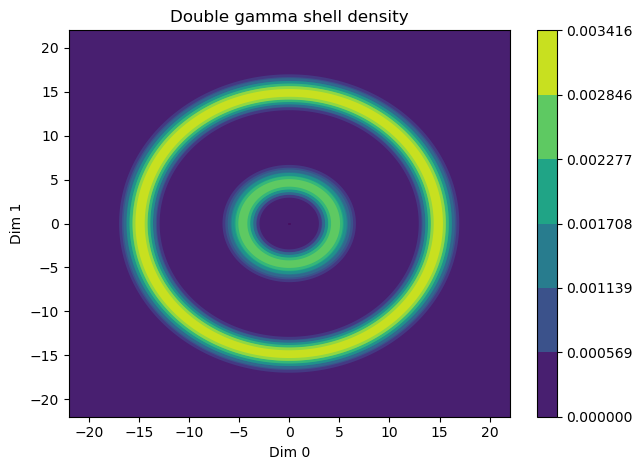

In [3]:
resolution = 1500

u_helper = DoubleGammaShell()

xs = torch.linspace(-22, 22, resolution)
ys = torch.linspace(-22, 22, resolution)
xx, yy = torch.meshgrid(xs, ys, indexing="xy")
xx_flat, yy_flat = xx.ravel(), yy.ravel()
zz_flat = -u_helper(torch.concat([xx_flat[:, None], yy_flat[:, None]], dim=1))
zz_flat = zz_flat.exp()
zz = zz_flat.view_as(xx)

min_level = zz.min()
max_level = zz.max()
n_levels = 7

plt.figure()
plt.contour(
    xx.numpy(),
    yy.numpy(),
    zz.numpy(),
    levels=np.linspace(min_level, max_level, n_levels),
    linewidths=2
)
plt.contourf(
    xx.numpy(),
    yy.numpy(),
    zz.numpy(),
    levels=np.linspace(min_level, max_level, n_levels),
    alpha=1
)
plt.title("Double gamma shell density")
plt.xlabel("Dim 0")
plt.ylabel("Dim 1")
plt.tight_layout()
plt.colorbar()
plt.show()